In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score

dataset = pd.read_csv('/content/data_wisata.csv')
dataset.drop('id', inplace=True,axis=1)

print('Sample Data:')
dataset.head()

Sample Data:


,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,satuan,tahun
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,MANCANEGARA,54927,ORANG,2014
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,NUSANTARA,4075198,ORANG,2014
2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,MANCANEGARA,49985,ORANG,2014
3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,NUSANTARA,2031979,ORANG,2014
4,32,JAWA BARAT,3203,KABUPATEN CIANJUR,MANCANEGARA,7824,ORANG,2014


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
enc = LabelEncoder()

In [14]:
dataset['nama_provinsi'] = enc.fit_transform(dataset['nama_provinsi'].values)
dataset['nama_kabupaten_kota'] = enc.fit_transform(dataset['nama_kabupaten_kota'].values)
dataset['jenis_wisatawan'] = enc.fit_transform(dataset['jenis_wisatawan'].values)
dataset['satuan'] = enc.fit_transform(dataset['satuan'].values)

In [15]:
dataset.head()

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,satuan,tahun
0,32,0,3201,3,0,54927,0,2014
1,32,0,3201,3,1,4075198,0,2014
2,32,0,3202,15,0,49985,0,2014
3,32,0,3202,15,1,2031979,0,2014
4,32,0,3203,5,0,7824,0,2014


In [5]:
dataset.isna().sum()

kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_wisatawan        0
jumlah_pengunjung      0
satuan                 0
tahun                  0
dtype: int64

In [6]:
dataset.dtypes

kode_provinsi           int64
nama_provinsi          object
kode_kabupaten_kota     int64
nama_kabupaten_kota    object
jenis_wisatawan        object
jumlah_pengunjung       int64
satuan                 object
tahun                   int64
dtype: object

In [27]:
x = dataset.iloc[:, :4]
y = dataset['nama_kabupaten_kota']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size= 0.3, random_state=0)

In [28]:
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [29]:
print('Decision Tree Accuracy : {:.3f}'.format(accuracy_score(yTest, dt.predict(xTest))))

Decision Tree Accuracy : 1.000


[Text(0.6802455357142857, 0.9583333333333334, 'x[3] <= 25.5\ngini = 0.962\nsamples = 282\nvalue = [10, 11, 10, 8, 9, 9, 11, 10, 10, 12, 9, 12, 9\n10, 13, 11, 10, 11, 11, 9, 9, 11, 9, 13, 13, 9\n13]'),
 Text(0.64453125, 0.875, 'x[3] <= 22.5\ngini = 0.961\nsamples = 269\nvalue = [10, 11, 10, 8, 9, 9, 11, 10, 10, 12, 9, 12, 9\n10, 13, 11, 10, 11, 11, 9, 9, 11, 9, 13, 13, 9\n0]'),
 Text(0.46763392857142855, 0.7916666666666666, 'x[3] <= 1.5\ngini = 0.956\nsamples = 234\nvalue = [10, 11, 10, 8, 9, 9, 11, 10, 10, 12, 9, 12, 9\n10, 13, 11, 10, 11, 11, 9, 9, 11, 9, 0, 0, 0\n0]'),
 Text(0.36160714285714285, 0.7083333333333334, 'x[3] <= 0.5\ngini = 0.499\nsamples = 21\nvalue = [10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.32589285714285715, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.39732142857142855, 0.625, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 

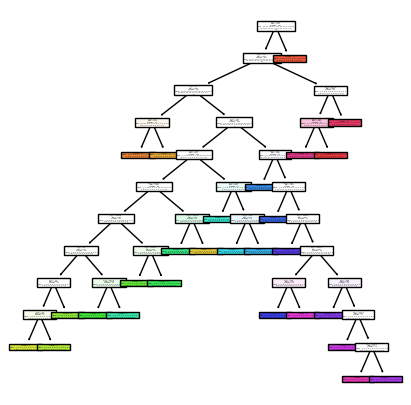

In [30]:
plt.figure(figsize=(5,5))
tree.plot_tree(dt, filled=True)